# Compare opsim databases using TDEsMetric

**[Opsim Databases](http://astro-lsst-01.astro.washington.edu:8080/)**

- [baseline2018](#baseline2018.db)
- [colossus_2667](#colossus_2667.db)
- [pontus_2573](#pontus_2573.db)
- [pontus_2579](#pontus_2579.db)
- [pontus_2489](#pontus_2489.db)
- [nexus_2097](#nexus_2097.db)

In [39]:
ls *.db

baseline2018a.db  mothra_2049.db  pontus_2489.db
colossus_2665.db  nexus_2097.db   pontus_2573.db
colossus_2667.db  obs5000.db      pontus_2579.db


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots

# open database use OpsimDatabase
# opsdb = db.OpsimDatabase('baseline2018a.db')

# output
outDir = 'outdir'
resultsDb = db.ResultsDb(outDir=outDir)



In [2]:
import pickle

import [TDEsMetricTest](https://github.com/xiaolng/maf/blob/master/TDEsMetricTest.py)


In [3]:
from mycode.TDEsMetricTest import TDEsMetricTest
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots


## TDEs light curve

**Minimum requirement for detection TDEs**

- one detection before peak in any band,  set nObsPrePeak=1;
- detections in three different bands within 5 days of peak, set nFiltersNearPeak=3, and nearPeakT=5;
- detections at least two bands post peak within two weeks, set nFiltersPostPeak=2, and postPeakT=14.


In [4]:
# light curve file
asciifile = 'TDEfaintfast_z0.1.dat'

# query columns 
mjdCol = 'observationStartMJD'
m5Col = 'fiveSigmaDepth'
filterCol = 'filter'
detectSNR={'u': 5, 'g': 5, 'r': 5, 'i': 5, 'z': 5, 'y': 5}

# light curve parameters
epochStart = -22
peakEpoch = 0
nearPeakT = 10
postPeakT = 14 # two weeks
nPhaseCheck = 1

# condition parameters
nObsTotal = {'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nObsPrePeak = 1
nObsNearPeak = {'u': 0, 'g': 0, 'r': 0, 'i': 0, 'z': 0, 'y': 0}
nFiltersNearPeak = 3
nObsPostPeak = 0 
nFiltersPostPeak = 2


In [8]:
# plot light curve
def plotlc(dataSlice, time_key='time', mag_key='mag', filter_key='filter', err_key = None,
          peakEpoch=None, nearPeakT=None, postPeakT=None):
    # Input: dataSlice, pandas DataFrame or numpy ndarray
    
    colors = {'u':'k', 'g':'b', 'r':'r', 'i':'m', 'z':'orange', 'y':'c'}
    
    plt.figure(figsize=(10, 6))
    for f in np.unique(dataSlice[filter_key]):
        fmatch = dataSlice[filter_key]==f
        time = dataSlice[time_key][fmatch]
        mag = dataSlice[mag_key][fmatch]
        
        # seperate pre/near/post peak
        if peakEpoch!=None:
            plt.axvline(x=peakEpoch, linestyle='-', linewidth=1)
            plt.axvline(x=peakEpoch-nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2, linestyle='--', linewidth=1)
            plt.axvline(x=peakEpoch+nearPeakT/2+postPeakT, linestyle='--', linewidth=1)
        
        if err_key!=None:
            mag_err = dataSlice[err_key][fmatch]
            plt.errorbar(time, mag, yerr=mag_err, color=colors[f], fmt='.', label=f)
        else:
            plt.scatter(time, mag, color=colors[f], marker='*', label=f)

    plt.legend()
    plt.xlabel('days')
    plt.ylabel('mag')
    plt.ylim(plt.ylim()[::-1])
    

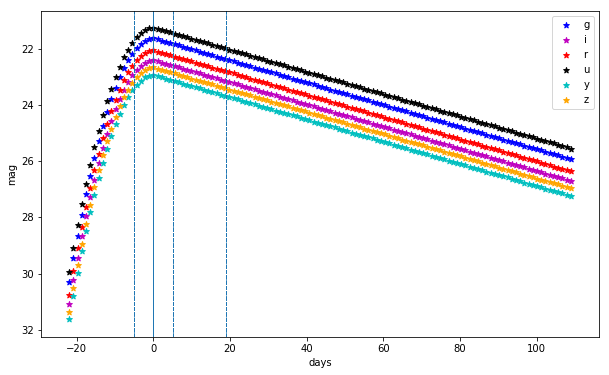

In [6]:
asciifile = 'TDEfaintfast_z0.1.dat'

lcv_template = np.genfromtxt(asciifile, dtype=[('ph', 'f8'), ('mag', 'f8'), ('flt', 'S1')])

df = pd.DataFrame()
df['ph'] = lcv_template['ph']
df['mag'] = lcv_template['mag']
df['flt'] = lcv_template['flt'].astype(str)

plotlc(df, time_key='ph', mag_key='mag', filter_key='flt', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)



## baseline2018.db

Project-official baseline (official opsim v4 baseline, 6/2018). No dome crawl.	

In [45]:
opsdb_baseline = db.OpsimDatabase('baseline2018a.db')

In [75]:
opsdb_baseline.fetchPropInfo()

({1: 'NorthEclipticSpur',
  2: 'SouthCelestialPole',
  3: 'WideFastDeep',
  4: 'GalacticPlane',
  5: 'DeepDrillingCosmology1'},
 {'WFD': [3], 'DD': [5], 'NES': [1]})

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 391886 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<730 and proposalId=3" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0124899  dipole: lon: 133.506, lat: -66.5458, amp: 0.0307803
Plotting complete.


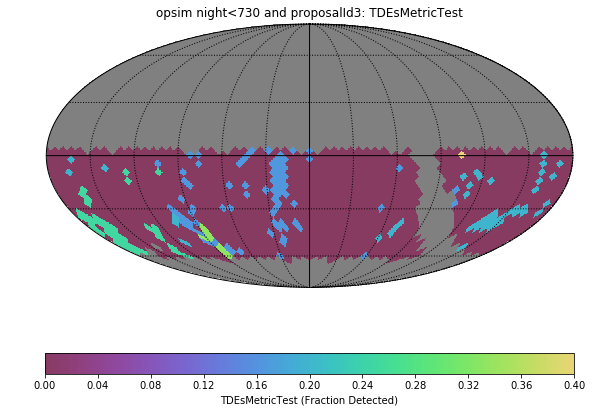

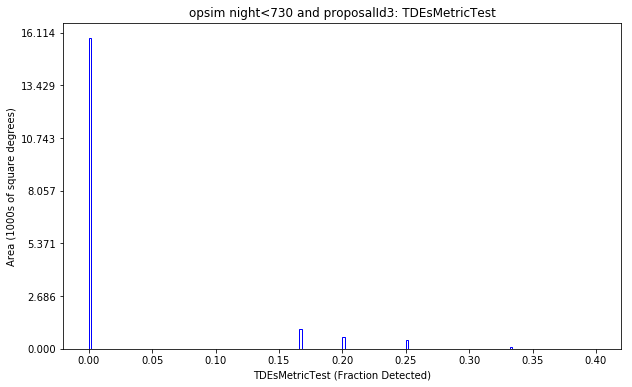

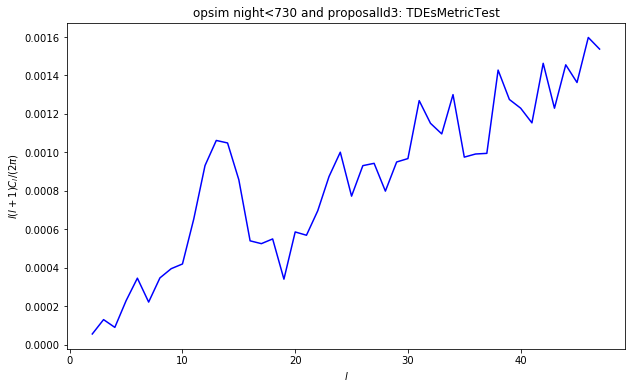

In [48]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<730 and proposalId=3'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

In [49]:
baseline2018_skymap = transmetricSky.metricValues

# write to file
pkfile = open('./opsdb/TDEsDb.pickle', 'wb')
pickle.dump(baseline2018_skymap, pkfile)
pkfile.close()

# load from file
# pkfile = open('./opsdb/TDEsDb.pickle', 'rb')
# var = pickle.load(pkfile)  # variables come out in order
# pkfile.close()


In [50]:
# view all metric values 
np.unique(baseline2018_skymap)

masked_array(data = [0.0 0.16666666666666666 0.2 0.25 0.3333333333333333 0.4 --],
             mask = [False False False False False False  True],
       fill_value = -1.6375e+30)

In [51]:
# get the ipix 
np.where(baseline2018_skymap==0.4) 

(array([1549]),)

In [52]:
hp.pix2ang(ipix=1549, nside=16, lonlat=True)

(255.9375, 0.0)

In [53]:
# create dataframe and save to csv file
df = pd.DataFrame(baseline2018_skymap)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df['metricValues'] = df[0]
del df[0]
df.to_csv('./opsdb/baseline2018_skymap.csv', index=False, na_rep='NaN')

# load from csv
# df = pd.read_csv('./opsdb/baseline2018_skymap.csv') 

df.head()

,ipix,ra,dec,metricValues
0,0,45.0,87.075820,NaN
1,1,135.0,87.075820,NaN
2,2,225.0,87.075820,NaN
3,3,315.0,87.075820,NaN
4,4,22.5,84.149733,NaN


In [61]:
# plot skymap
def plot_mwd(RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide'):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='D')  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

    

/home/docmaf/stack/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


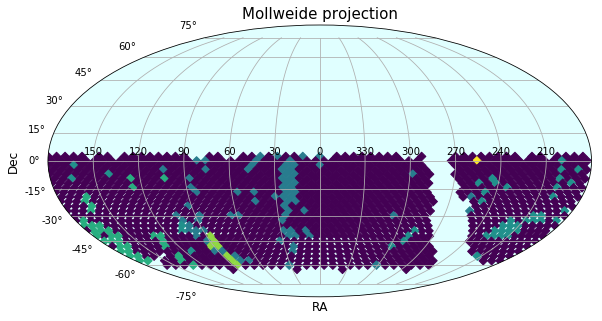

In [62]:
plot_mwd(df['ra'], df['dec'], df['metricValues'])

In [64]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ra,dec of ipix 
ra = np.array([255.9375])
dec = np.array([0.0])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<730 and proposalId=3'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_baseline, outDir=outDir, resultsDb=resultsDb)
group.runAll()


Finish initializing metric
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 391886 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [84]:
# save file and plot light curve
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

df.to_csv('./opsdb/baseline2018_lc.csv', index=False)

# load from csv
# df = pd.read_csv('./opsdb/baseline2018_lc.csv')

TypeError: 'NoneType' object is not subscriptable

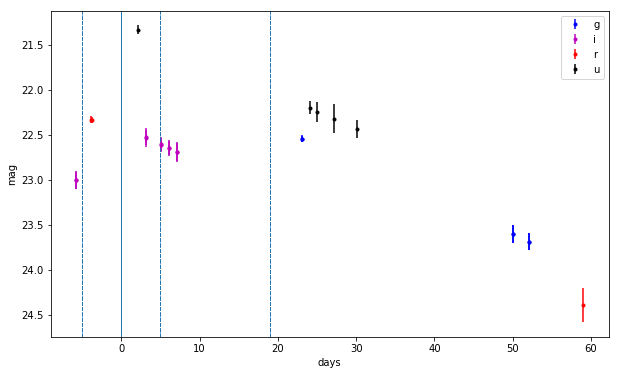

In [70]:
# plotlc(df[ (df['lcAboveThresh'])], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==3)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)




In [37]:
df3 = df[(df['lcNumber']==3)&(df['nearPeakCheck'])]
df3

,detected,expMJD,filters,lcAboveThresh,lcEpoch,lcMags,lcMagsStd,lcNumber,lcSNR,m5,nearPeakCheck,postPeakCheck,prePeakCheck,tshift
115,True,60436.299525,r,True,-3.812014,22.329820,0.038450,3.0,27.740342,24.190175,True,False,False,0.0
116,True,60436.315625,r,True,-3.795914,22.327625,0.033274,3.0,32.133071,24.347580,True,False,False,0.0
117,True,60442.244745,u,True,2.133206,21.327571,0.046809,3.0,22.698864,22.970156,True,False,False,0.0
118,True,60443.275718,i,True,3.164178,22.525061,0.082657,3.0,12.641720,23.532151,True,False,False,0.0
119,True,60443.297326,i,True,3.185787,22.525847,0.101201,3.0,10.236299,23.303779,True,False,False,0.0


## colossus_2667.db

Survey with single visits only. Standard visits in pairs each night replaced with single visits per night.	

In [71]:
opsdb_colossus_2667 = db.OpsimDatabase('colossus_2667.db')

In [74]:
opsdb_colossus_2667.fetchPropInfo()

({1: 'WideFastDeep',
  2: 'GalacticPlane',
  3: 'SouthCelestialPole',
  4: 'NorthEclipticSpur',
  5: 'DeepDrillingCosmology1'},
 {'WFD': [1], 'DD': [5], 'NES': [4]})

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<730 and proposalId=1 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 411558 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<730 and proposalId=1" constraint now.
monopole: 0.137486  dipole: lon: 10.9064, lat: 61.5308, amp: 0.0727517
Plotting complete.


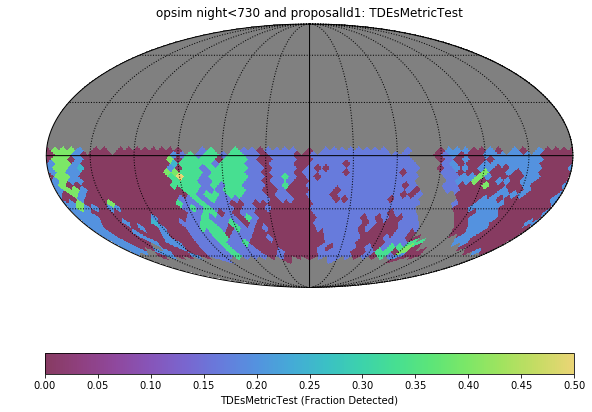

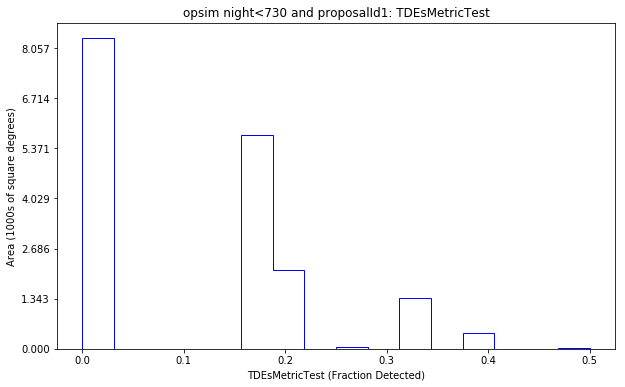

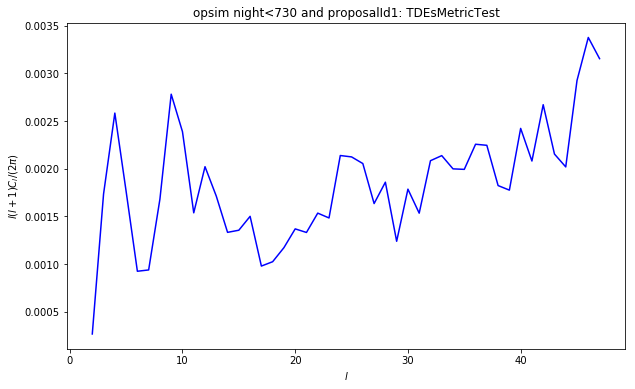

In [76]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<730 and proposalId=1'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_colossus_2667, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [78]:
colossus_2667_skymap = transmetricSky.metricValues
np.unique(colossus_2667_skymap)

masked_array(data = [0.0 0.16666666666666666 0.2 0.25 0.3333333333333333 0.4 0.5 --],
             mask = [False False False False False False False  True],
       fill_value = -1.6375e+30)

In [81]:
np.where(colossus_2667_skymap==0.5)

(array([1840]),)

In [82]:
hp.pix2ang(ipix=1840, nside=16, lonlat=True)

(90.0, -12.024699180565818)

In [77]:
# create dataframe and save to csv file
df = pd.DataFrame(colossus_2667_skymap)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df['metricValues'] = df[0]
del df[0]
df.to_csv('./opsdb/colossus_2667_skymap.csv', index=False, na_rep='NaN')

# load from csv
# df = pd.read_csv('./opsdb/baseline2018_skymap.csv') 

df.head()

,ipix,ra,dec,metricValues
0,0,45.0,87.075820,NaN
1,1,135.0,87.075820,NaN
2,2,225.0,87.075820,NaN
3,3,315.0,87.075820,NaN
4,4,22.5,84.149733,NaN


In [87]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ra,dec of ipix 
ra = np.array([90.0])
dec = np.array([-12.02469])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<730 and proposalId=1'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_colossus_2667, outDir=outDir, resultsDb=resultsDb)
group.runAll()


Finish initializing metric
Querying database SummaryAllProps with constraint night<730 and proposalId=1 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 411558 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [88]:
# save file and plot light curve
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

df.to_csv('./opsdb/colossus_2667_lc.csv', index=False)

# load from csv
# df = pd.read_csv('./opsdb/colossus_2667_lc.csv')

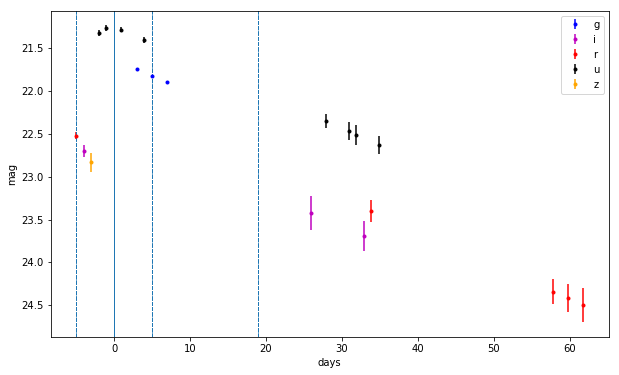

In [92]:
# plot light curve
# plotlc(df[ (df['lcAboveThresh'])], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==0)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)



## pontus_2573.db

A baseline configuration but with mixed-filter pairs (g+r+i, uzy same-filter). FBS.	

In [93]:
opsdb_pontus_2573 = db.OpsimDatabase('pontus_2573.db')

In [94]:
opsdb_pontus_2573.fetchPropInfo()

({1: 'NorthEclipticSpur',
  2: 'SouthCelestialPole',
  3: 'WideFastDeep',
  4: 'GalacticPlane',
  5: 'DeepDrillingCosmology1'},
 {'WFD': [3], 'DD': [5], 'NES': [1]})

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 377502 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<730 and proposalId=3" constraint now.
monopole: 0.135512  dipole: lon: 72.2657, lat: -9.25769, amp: 0.0664121
Plotting complete.


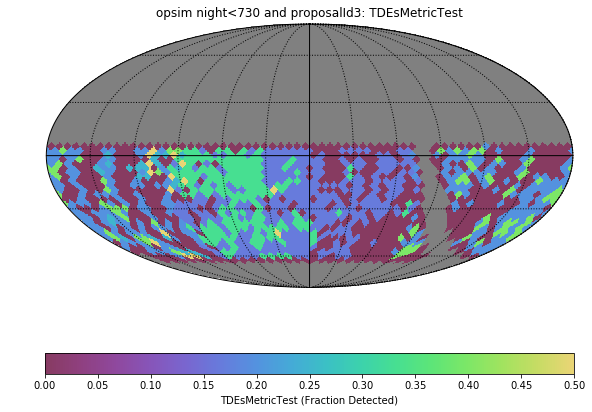

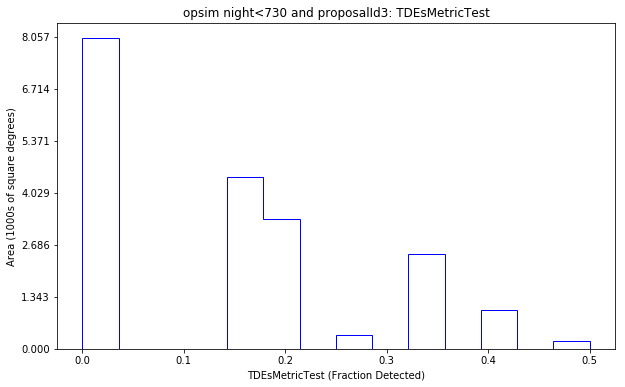

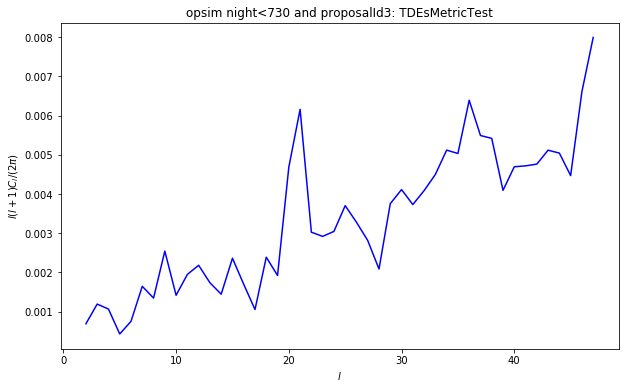

In [96]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<730 and proposalId=3'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2573, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

In [97]:
pontus_2573_skymap = transmetricSky.metricValues
np.unique(pontus_2573_skymap)


masked_array(data = [0.0 0.16666666666666666 0.2 0.25 0.3333333333333333 0.4 0.5 --],
             mask = [False False False False False False False  True],
       fill_value = -1.6375e+30)

In [98]:
np.where(pontus_2573_skymap==0.5)


(array([1459, 1520, 1523, 1647, 1651, 1779, 1841, 1903, 2020, 2033, 2596,
        2612, 2728, 2865, 2866]),)

In [99]:
# get ra,dec
hp.pix2ang(ipix=2020, nside=16, lonlat=True)

(25.3125, -19.471220634490692)

In [100]:
# create dataframe and save to csv file
df = pd.DataFrame(pontus_2573_skymap)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df['metricValues'] = df[0]
del df[0]
df.to_csv('./opsdb/pontus_2573_skymap.csv', index=False, na_rep='NaN')

# load from csv
# df = pd.read_csv('./opsdb/baseline2018_skymap.csv') 

df.head()

,ipix,ra,dec,metricValues
0,0,45.0,87.075820,NaN
1,1,135.0,87.075820,NaN
2,2,225.0,87.075820,NaN
3,3,315.0,87.075820,NaN
4,4,22.5,84.149733,NaN


In [101]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ra,dec of ipix 
ra = np.array([25.3125])
dec = np.array([-19.47122])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<730 and proposalId=3'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2573, outDir=outDir, resultsDb=resultsDb)
group.runAll()


Finish initializing metric
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 377502 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [102]:
# save file and plot light curve
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

df.to_csv('./opsdb/pontus_2573_lc.csv', index=False)

# load from csv
# df = pd.read_csv('./opsdb/pontus_2573_lc.csv')

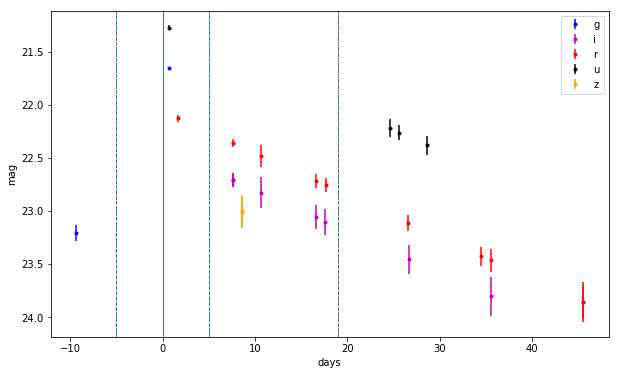

In [107]:
# plot light curve
# plotlc(df[ (df['lcAboveThresh'])], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==5)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)

## pontus_2579.db

A rolling cadence run with 2 declination bands, which gently alternate per year. Observations in the "off year" band reach about 25% of the mean level, while "on years" hit 75% of the mean number of observations.	

In [108]:
opsdb_pontus_2579 = db.OpsimDatabase('pontus_2579.db')
opsdb_pontus_2579.fetchPropInfo()

({1: 'NorthEclipticSpur',
  2: 'SouthCelestialPole',
  3: 'WideFastDeep',
  4: 'GalacticPlane',
  5: 'DeepDrillingCosmology1'},
 {'WFD': [3], 'DD': [5], 'NES': [1]})

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 388502 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<730 and proposalId=3" constraint now.
monopole: 0.0564943  dipole: lon: 20.6647, lat: 62.6166, amp: 0.0287878
Plotting complete.


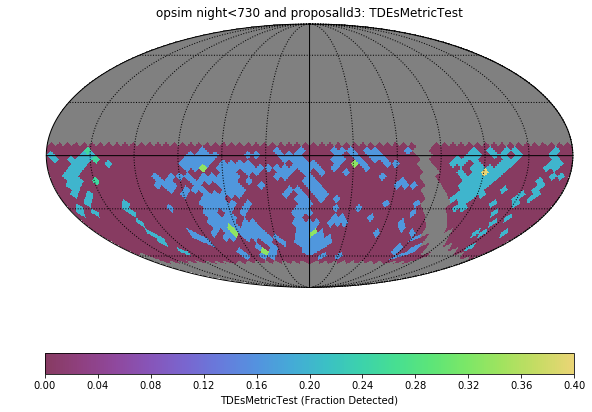

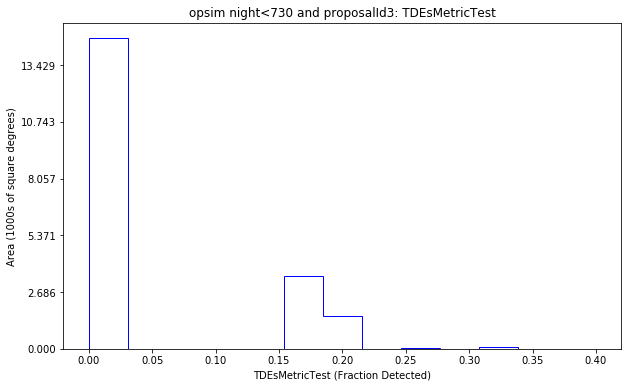

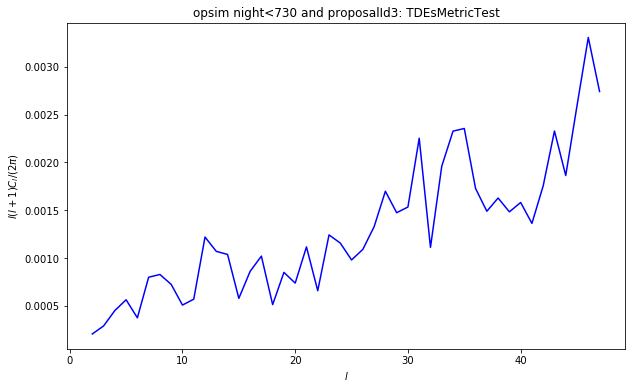

In [110]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<730 and proposalId=3'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2579, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [111]:
pontus_2579_skymap = transmetricSky.metricValues
np.unique(pontus_2579_skymap)

masked_array(data = [0.0 0.16666666666666666 0.2 0.25 0.3333333333333333 0.4 --],
             mask = [False False False False False False  True],
       fill_value = -1.6375e+30)

In [112]:
np.where(pontus_2579_skymap==0.4)

(array([1802]),)

In [113]:
hp.pix2ang(ipix=1802, nside=16, lonlat=True)

(239.0625, -9.5940682268604576)

In [114]:
# create dataframe and save to csv file
df = pd.DataFrame(colossus_2667_skymap)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df['metricValues'] = df[0]
del df[0]
df.to_csv('./opsdb/pontus_2579_skymap.csv', index=False, na_rep='NaN')

# load from csv
# df = pd.read_csv('./opsdb/pontus_2579_skymap.csv') 
df.head()

,ipix,ra,dec,metricValues
0,0,45.0,87.075820,NaN
1,1,135.0,87.075820,NaN
2,2,225.0,87.075820,NaN
3,3,315.0,87.075820,NaN
4,4,22.5,84.149733,NaN


In [115]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ra,dec of ipix 
ra = np.array([239.0625])
dec = np.array([-9.59406])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<730 and proposalId=3'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2579, outDir=outDir, resultsDb=resultsDb)
group.runAll()

Finish initializing metric
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 388502 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [116]:
# save file and plot light curve
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

df.to_csv('./opsdb/pontus_2579_lc.csv', index=False)

# load from csv
# df = pd.read_csv('./opsdb/pontus_2579_lc.csv')

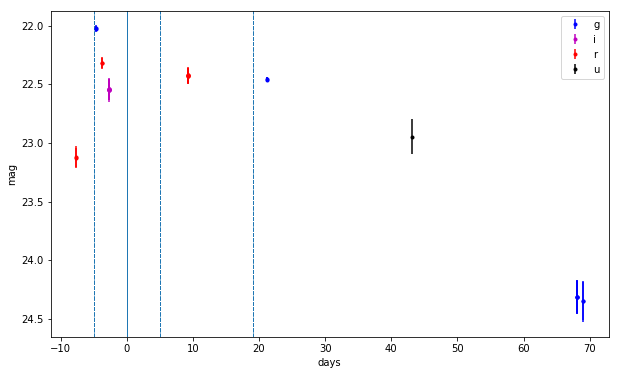

In [125]:
# plot light curve
# plotlc(df[ (df['lcAboveThresh'])], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==3)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)

## pontus_2489.db

Survey with more visits. Standard 2x15s visits replaced with 1x20s in grizy and 1x40s in u band.

In [126]:
opsdb_pontus_2489 = db.OpsimDatabase('pontus_2489.db')
opsdb_pontus_2489.fetchPropInfo()

({1: 'GalacticPlane',
  2: 'NorthEclipticSpur',
  3: 'WideFastDeep',
  4: 'SouthCelestialPole',
  5: 'DeepDrillingCosmology1'},
 {'WFD': [3], 'DD': [5], 'NES': [2]})

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 574166 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<730 and proposalId=3" constraint now.
monopole: 0.0549232  dipole: lon: 56.7801, lat: -57.5442, amp: 0.0230955
Plotting complete.


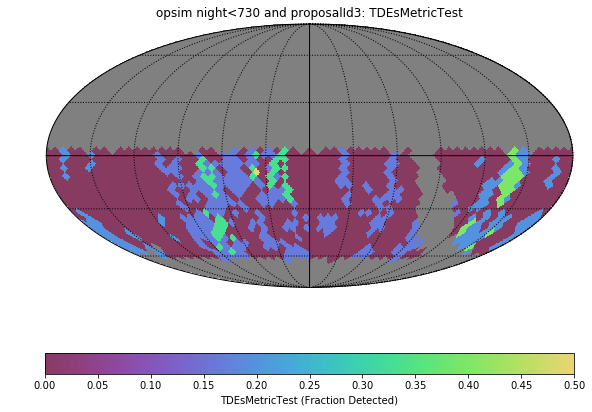

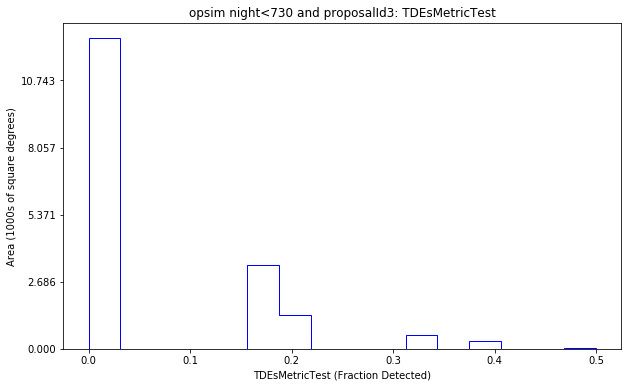

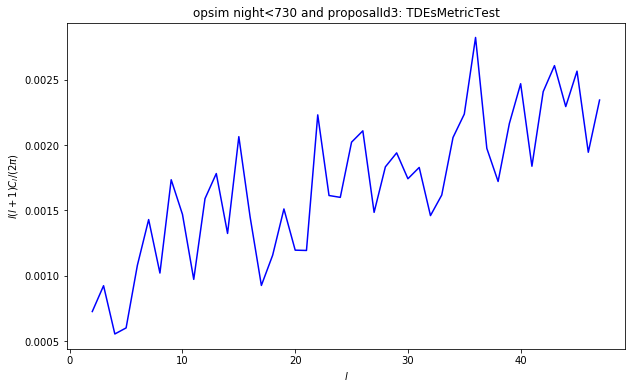

In [127]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<730 and proposalId=3'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2489, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [128]:
pontus_2489_skymap = transmetricSky.metricValues
np.unique(pontus_2489_skymap)

masked_array(data = [0.0 0.16666666666666666 0.2 0.3333333333333333 0.4 0.5 --],
             mask = [False False False False False False  True],
       fill_value = -1.6375e+30)

In [129]:
np.where(pontus_2489_skymap==0.5)


(array([1766]),)

In [130]:
hp.pix2ang(ipix=1766, nside=16, lonlat=True)


(36.5625, -9.5940682268604576)

In [131]:
# create dataframe and save to csv file
df = pd.DataFrame(colossus_2667_skymap)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df['metricValues'] = df[0]
del df[0]
df.to_csv('./opsdb/pontus_2489_skymap.csv', index=False, na_rep='NaN')

# load from csv
# df = pd.read_csv('./opsdb/pontus_2489_skymap.csv') 


In [132]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ra,dec of ipix 
ra = np.array([36.5625])
dec = np.array([-9.59406])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<730 and proposalId=3'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_pontus_2489, outDir=outDir, resultsDb=resultsDb)
group.runAll()

Finish initializing metric
Querying database SummaryAllProps with constraint night<730 and proposalId=3 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 574166 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [133]:
# save file and plot light curve
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

df.to_csv('./opsdb/pontus_2489_lc.csv', index=False)

# load from csv
# df = pd.read_csv('./opsdb/pontus_2489_lc.csv')

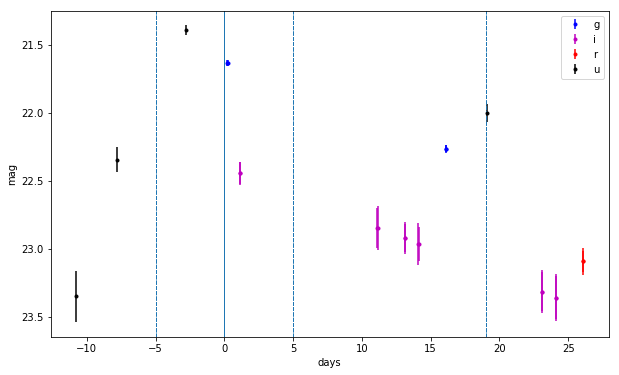

In [136]:
# plot light curve
# plotlc(df[ (df['lcAboveThresh'])], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==3)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)

## nexus_2097.db

A rolling cadence on a very large WFD footprint (24,700 sq deg). Three regions of declination, alternating on/off every third year from years 3-8. Full WFD coverage in years 1-2, 8-10 (first and last two years).	

In [137]:
opsdb_nexus_2097 = db.OpsimDatabase('nexus_2097.db')

opsdb_nexus_2097.fetchPropInfo()

({1: 'WideFastDeep', 2: 'DeepDrillingCosmology1'},
 {'WFD': [1], 'DD': [2], 'NES': []})

Finish initializing metric
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with constraint night<730 and proposalId=1 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 444918 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night<730 and proposalId=1" constraint now.


/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  nbins = (binmax - binmin) / binwidth
/home/docmaf/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/sims_maf/2.8.0.sims/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make inf bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0146107  dipole: lon: 137.649, lat: -20.2031, amp: 0.00984468
Plotting complete.


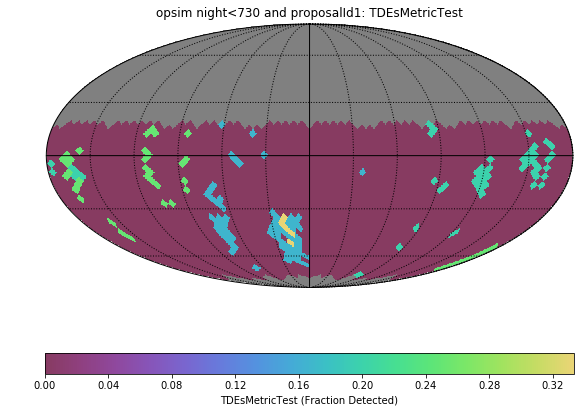

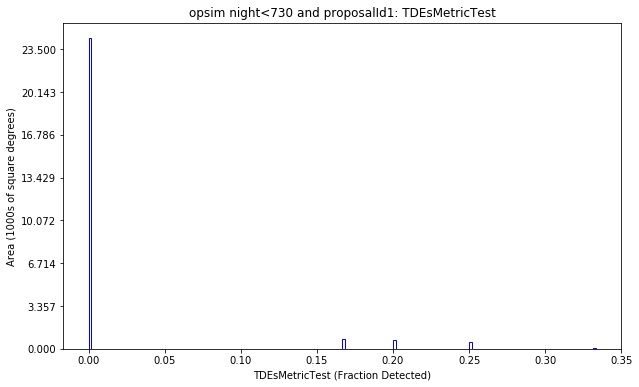

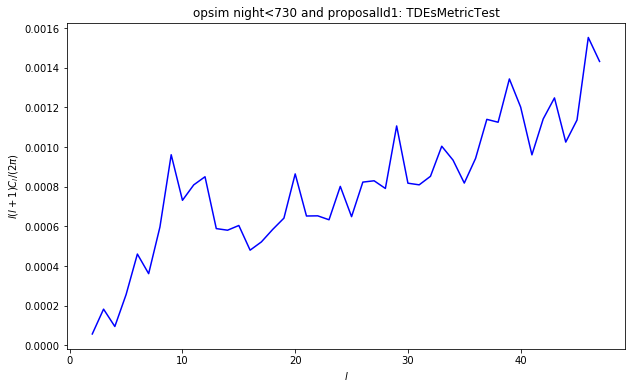

In [138]:
## get skymap
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=False)

slicer = slicers.HealpixSlicer(nside=16) 
sqlconstraint = 'night<730 and proposalId=1'

transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_nexus_2097, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)


In [139]:
nexus_2097_skymap = transmetricSky.metricValues
np.unique(nexus_2097_skymap)


masked_array(data = [0.0 0.16666666666666666 0.2 0.25 0.3333333333333333 --],
             mask = [False False False False False  True],
       fill_value = -1.6375e+30)

In [145]:
np.where(nexus_2097_skymap==0.2)

(array([1105, 1168, 1221, 1233, 1347, 1410, 1412, 1477, 1538, 1540, 1541,
        1603, 1605, 1606, 1610, 1663, 1668, 1669, 1725, 1731, 1732, 1734,
        1738, 1739, 1788, 1791, 1796, 1802, 1803, 1852, 1853, 1859, 1860,
        1866, 1867, 1930, 1931, 1936, 1987, 1988, 1994, 1995, 1999, 2058,
        2063, 2122, 2576, 2631, 2796, 3027]),)

In [146]:
hp.pix2ang(ipix=1105, nside=16, lonlat=True)


(275.625, 16.957763300004146)

In [142]:
# create dataframe and save to csv file
df = pd.DataFrame(colossus_2667_skymap)
df['ipix'] = df.index 
df['ra'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[0]
df['dec'] = hp.pix2ang(ipix=df['ipix'], nside=16, lonlat=True)[1]
df['metricValues'] = df[0]
del df[0]
df.to_csv('./opsdb/nexus_2097_skymap.csv', index=False, na_rep='NaN')

# load from csv
# df = pd.read_csv('./opsdb/nexus_2097_skymap.csv') 
df.head()

,ipix,ra,dec,metricValues
0,0,45.0,87.075820,NaN
1,1,135.0,87.075820,NaN
2,2,225.0,87.075820,NaN
3,3,315.0,87.075820,NaN
4,4,22.5,84.149733,NaN


In [147]:
## get light curve
transmetric = TDEsMetricTest(asciifile=asciifile, mjdCol=mjdCol, m5Col=m5Col, filterCol=filterCol, 
                 detectSNR=detectSNR,
                 epochStart=epochStart, peakEpoch=peakEpoch, nearPeakT=nearPeakT, nPhaseCheck=nPhaseCheck,
                 nObsTotal= nObsTotal,nObsPrePeak=nObsPrePeak, 
                 nObsNearPeak=nObsNearPeak, nFiltersNearPeak=nFiltersNearPeak, 
                 nObsPostPeak=nObsPostPeak, nFiltersPostPeak=nFiltersPostPeak,
                 dataout=True)
# ra,dec of ipix 
ra = np.array([275.625])
dec = np.array([16.9577])
slicer = slicers.UserPointsSlicer(ra, dec)

sqlconstraint = 'night<730 and proposalId=1'
transmetricSky = metricBundles.MetricBundle(transmetric,slicer,sqlconstraint)

group = metricBundles.MetricBundleGroup({'transmetricSky':transmetricSky}, opsdb_nexus_2097, outDir=outDir, resultsDb=resultsDb)
group.runAll()


Finish initializing metric
Querying database SummaryAllProps with constraint night<730 and proposalId=1 for columns ['fieldDec', 'fieldRA', 'filter', 'observationStartMJD', 'fiveSigmaDepth']
Found 444918 visits
Running:  ['transmetricSky']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [148]:
# save file and plot light curve
output_dict_list = transmetricSky.metricValues.data[0]
df = pd.DataFrame(output_dict_list[0])

df.to_csv('./opsdb/nexus_2097_lc.csv', index=False)

# load from csv
# df = pd.read_csv('./opsdb/nexus_2097_lc.csv')

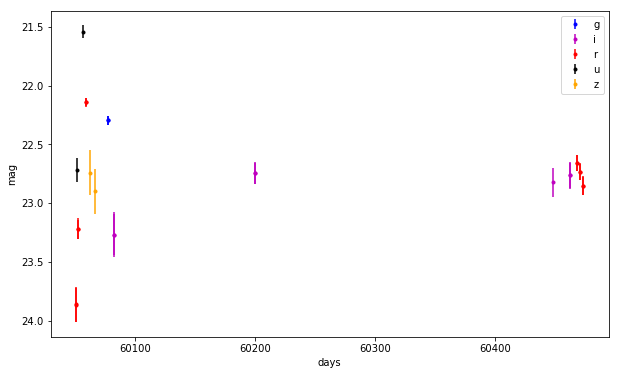

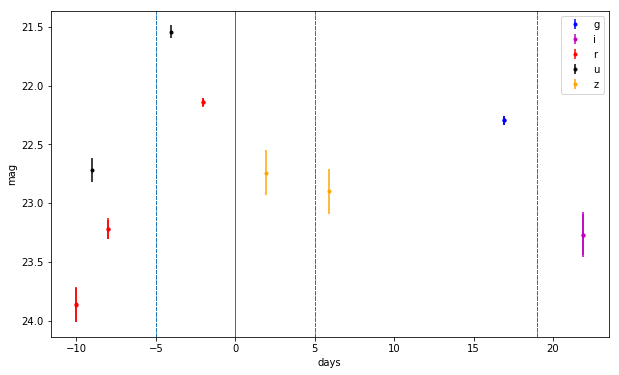

In [157]:
# plot light curve
plotlc(df[ (df['lcAboveThresh'])], time_key='expMJD', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd')

plotlc(df[ (df['lcAboveThresh']) & (df['lcNumber']==0)], time_key='lcEpoch', mag_key='lcMags', filter_key='filters', err_key='lcMagsStd', peakEpoch=peakEpoch, nearPeakT=nearPeakT, postPeakT=postPeakT)


## Summary

In [159]:
df_sum = pd.DataFrame()
df_sum['Opsim'] = ['baseline2018', 'colossus_2667','pontus_2573','pontus_2579', 'pontus_2489', 'nexus_2097']
df_sum['comment'] = ['official baseline', 'single visits', 'mixed filter pairs', 'rolling cadence', 'more visits', 'rolling large WFD']
df_sum['nights'] = [700, 700, 700, 700, 700, 700]
df_sum['Fraction Detected'] = [0.01, 0.13, 0.13, 0.05, 0.05, 0.01]
df_sum



,Opsim,comment,nights,Fraction Detected
0,baseline2018,official baseline,700,0.01
1,colossus_2667,single visits,700,0.13
2,pontus_2573,mixed filter pairs,700,0.13
3,pontus_2579,rolling cadence,700,0.05
4,pontus_2489,more visits,700,0.05
5,nexus_2097,rolling large WFD,700,0.01


pontus_2573, colossus_2667 have the best performance.